# Содержание #
<div>
    <ol>
        <li>
            <a href="#lib_import">Импорт библиотек</a>
        </li>
        <li>
            <a href="#data">Данные</a>
        </li>
        <ul>
            <li>
                <a href="#data_plot">Влияние данных на целевой параметр</a>
            </li>
        </ul>
        <li>
            <a href="#prepare">Подготовка данных</a>
        </li>
        <ul>
            <li>
                <a href="#prepare_split">Деление данных на признаки, результаты</a>
            </li>
            <li>
                <a href="#prepare_train">Выделение обучающего набора</a>
            </li>
            <li>
                <a href="#prepare_valid_test">Выделение тестового/валидационного набора</a>
            </li>
        </ul>
        <li>
            <a href="#models">Исследование моделей</a>
        </li>
        <ul>
            <li>
                <a href="#models_decision_tree_hyper">Подбор гиперпараметров DecisionTreeClassifier</a>
            </li>
            <li>
                <a href="#models_rand_forest_hyper">Подбор гиперпараметров RandomForestClassifier</a>
            </li>
            <li>
                <a href="#models_log_regress_hyper">Подбор гиперпараметров LogisticRegression</a>
            </li>
            <li>
                <a href="#models_train_&_valid">Объединение обучающей и валидационной выборки</a>
            </li>
            <li>
                <a href="#models_fit">Обучение моделей "Дерево решений", "Случайный лес"</a>
            </li>
            <li>
                <a href="#models_score">Оценка качества моделей</a>
            </li>
            <li>
                <a href="#models_dummy_score">Проверка качества константной моделью</a>
            </li>
        </ul>
        <li>
            <a href="#output">Вывод</a>
        </li>
    </ol>
</div>

<a id="lib_import"></a>
## Импорт библиотек ##

In [1]:
import pandas as pd
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

<a id="data"></a>
# Данные #

In [2]:
df = pd.read_csv('/datasets/users_behavior.csv')
df

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
...,...,...,...,...,...
3209,122.0,910.98,20.0,35124.90,1
3210,25.0,190.36,0.0,3275.61,0
3211,97.0,634.44,70.0,13974.06,0
3212,64.0,462.32,90.0,31239.78,0


<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>

Предобработка данных не требуется, соглашусь. В принципе, только параметр числа звонков можно перевести в целочисленный тип. А вот знакомство с данными стоит выполнять в полном объеме. Важно изучить корреляции в данных. Так мы можем оценить взаимосвязи в данных и влияние параметров на целевой признак. Рекомендую посмотреть метод sns.pairplot с параметром hue, в который мы передаем целевой признак. Будет здорово, если ты сможешь это реализовать. 

</div>

<div class="alert alert-info">
<font size="5"><b>Комментарий студента</b></font>
    Добавил.
</div>

<a id="data_plot"></a>
## Влияние данных на целевой параметр ##

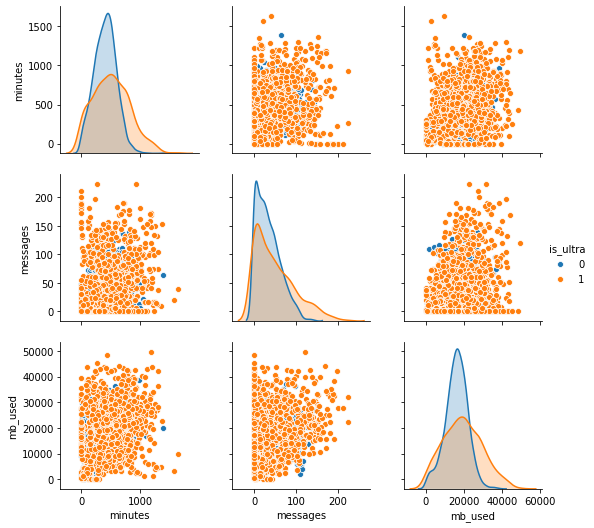

In [3]:
sns.pairplot(data=df, 
             hue='is_ultra',
             vars=['minutes', 'messages', 'mb_used'])

### Результат ###
* исключить столбец df['calls'], т.к. количество звонков не влияет на объемы потребленной абонентом услуги.

<a id='prepare'></a>
# Подготовка данных #

<a id='prepare_split'></a>
## Деление данных на признаки, результаты ##

In [4]:
features = df.drop(columns=['is_ultra', 'calls'])
target = df.is_ultra
print(features.shape)
print(target.shape)

(3214, 3)
(3214,)


<a id='prepare_train'></a>
## Выделение обучающего набора ##

In [5]:
features_train, features_test, target_train, target_test = train_test_split(features, 
                                                                            target, 
                                                                            train_size=0.6, 
                                                                            random_state=12345,
                                                                            stratify=target)

<a id='prepare_valid_test'></a>
## Выделение тестового/валидационного набора ##

In [6]:
# Выделение тестового и валидационного набора данных
features_test, features_valid, target_test, target_valid = train_test_split(features_test, 
                                                                            target_test, 
                                                                            test_size=0.5, 
                                                                            random_state=12345,
                                                                            stratify=target_test)

In [ ]:
print(df.shape)
print(features_train.shape)
print(features_test.shape)
print(features_valid.shape)


<a id='models'></a>
# Исследование моделей #

<a id='models_decision_tree_hyper'></a>
## Подбор гиперпараметров DecisionTreeClassifier ##

In [8]:
dec_tree_best_model = None
dec_tree_best_result = 0
dec_tree_depth = 0
for depth in range(1,51):
    model = DecisionTreeClassifier(max_depth=depth, random_state=12345)
    model.fit(features_train, target_train)
    result = model.score(features_valid, target_valid)

    if result > dec_tree_best_result:
        dec_tree_best_model = model
        dec_tree_best_result = result
        dec_tree_depth = depth

train_predict = dec_tree_best_model.predict(features_train)
train_accuracy = accuracy_score(target_train, train_predict)

print(f"""Accuracy наилучшей модели на валидационной выборке:{dec_tree_best_result}
Accuracy наилучшей модели на обучающей выборке:{train_accuracy}
Глубина дерева:{dec_tree_depth} """)

Accuracy наилучшей модели на валидационной выборке:0.8009331259720062
Accuracy наилучшей модели на обучающей выборке:0.8781120331950207
Глубина дерева:10 


<a id='models_rand_forest_hyper'></a>
## Подбор гиперпараметров RandomForestClassifier ##

In [9]:
rand_forest_best_model = None
rand_forest_best_result = 0
rand_forest_depth = 0
rand_forest_est = 0

for est in range(10,51,10):
    for depth in range(1,51):
        model = RandomForestClassifier(max_depth=depth, n_estimators=est, random_state=12345)
        model.fit(features_train, target_train)
        result = model.score(features_valid, target_valid)

        if result > rand_forest_best_result:
            rand_forest_best_model = model
            rand_forest_best_result = result
            rand_forest_depth = depth
            rand_forest_est = est

train_predict = rand_forest_best_model.predict(features_train)
train_accuracy = accuracy_score(target_train, train_predict)
print(f"""Accuracy наилучшей модели на валидационной выборке: {rand_forest_best_result}
Accuracy наилучшей модели на обучающей выборке: {train_accuracy}
Глубина деревьев: {rand_forest_depth}
Количество деревьев: {rand_forest_est}""")

Accuracy наилучшей модели на валидационной выборке: 0.8367029548989113
Accuracy наилучшей модели на обучающей выборке: 0.9242738589211619
Глубина деревьев: 13
Количество деревьев: 50


<a id='models_log_regress_hyper'></a>
## Подбор гиперпараметров LogisticRegression ##

In [10]:
log_regress_model = LogisticRegression(class_weight='balanced', random_state=12345, solver='liblinear')
log_regress_model.fit(features_train, target_train)
log_regress_result = log_regress_model.score(features_valid, target_valid)
print(f"Accuracy модели на валидационной выборке: {log_regress_result}")

Accuracy модели на валидационной выборке: 0.6267496111975117


<a id='models_train_&_valid'></a>
## Объединение обучающей и валидационной выборки ##

In [11]:
features_test_fit = features_train.append(features_valid)
target_test_fit = target_train.append(target_valid)
print(features_test_fit.shape)
print(target_test_fit.shape)

(2571, 3)
(2571,)


<a id='models_fit'></a>
## Обучение моделей "Дерево решений", "Случайный лес" ##

In [12]:
dec_tree_best_model.fit(features_test_fit, target_test_fit)
rand_forest_best_model.fit(features_test_fit, target_test_fit)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=13, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=12345,
                       verbose=0, warm_start=False)

<a id='models_score'></a>
## Оценка качества моделей ##

In [13]:
dec_tree_test_result = dec_tree_best_model.score(features_test, target_test)
print(f'Accuracy модели "Дерево решений" на тестовой выборке: {dec_tree_test_result}')

rand_forest_test_result = rand_forest_best_model.score(features_test, target_test)
print(f'Accuracy модели "Случайный лес" на тестовой выборке: {rand_forest_test_result}')

Accuracy модели "Дерево решений" на тестовой выборке: 0.7962674961119751
Accuracy модели "Случайный лес" на тестовой выборке: 0.8180404354587869


<a id='models_dummy_score'></a>
## Проверка качества константной моделью ##

In [15]:
model = DummyClassifier(random_state=12345)
model.fit(features_train, target_train)
dummy_score_valid = model.score(features_valid, target_valid)
model.fit(features_test_fit, target_test_fit)
dummy_score_test = model.score(features_test, target_test)
print(f"""Accuracy модели "DummyClassifier" на валидационной выборке: {dummy_score_valid}
Accuracy модели "DummyClassifier" на тестовой выборке: {dummy_score_test}""")

Accuracy модели "DummyClassifier" на валидационной выборке: 0.5567651632970451
Accuracy модели "DummyClassifier" на тестовой выборке: 0.5598755832037325


<a id='output'></a>
# Вывод #
Из 3 исследованных моделей, наивысшую точность предсказаний показала модель "Случайный лес".
Точность предсказаний относительно модели "Дерево решений" выше всего на 2%.
Учитывая что скорость работы модели "Случайный лес", ниже модели "Дерево решений", для решения поставленной задачи целесообразно использовать модель "Дерево решений".
Модель "Логистическая регерессия" исключена из рассмотрения, по причине низкой точности предсказаний = 62.7%.
Точность модели "Логистическая регрессия" не удовлетворяет условиям задачи.